# CORNELL MOVIE-DIALOGS CORPUS EDA

<b>Note:</b> While I initially intended to use this dataset for my capstone project, after initially disappointing results when it came to modeling, I decided to go in another direction.

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

import regex as re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.util import ngrams

import gensim

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, ImageColorGenerator

import spacy

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))#to expand the size of my container so it can take fill up my entire monitor

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'

pd.options.display.max_rows = 200 #increasing maximum viewable rows and columns
pd.options.display.max_columns = 200

<b>Dataset:</b> <a href="https://www.kaggle.com/Cornell-University/movie-dialog-corpus">Cornell Movie-Dialogs Corpus</a>

Containing a large metadata-rich collection of fictional conversations extracted from raw movie scripts, this dataset features 220,000+ conversations between 10,000+ pairs of movie characters. It involves more than 9,000 characters across 617 movies, and features a total of 304,713 utterances.

<b>Dataset selection note:</b>

Initially I was looking for a dataset that was created with more of a business context in mind, however I decided to go away from doing so for several reasons:
- The business datasets were usually customer service in nature, as in "I have this specific problem with your product, where can I go to get it resolved?" While useful, the capacity for that is limited and isn't geared towards sales.<br><br>
- Speaking to the first point, the other datasets were created through a series of "natural" customer service interaction. <br><br>
While copy is influenced by “natural” interactions and market research, a lot of it is more deliberate than that. Customer service's primary aim is to fix a problem. The primary aim of copywriting or corporate sales is to get someone to act.<br><br>
Conversations had through copy or in B2B sales are more manufactured as opposed to strictly a result of natural interactions, so how things sound with movie dialogue will give a better indication as to how things might sound via a body of man made text (even a B2B sales deck isn’t necessarily reflective of “natural” conversation, often it reflects the sales points you want to hit and the natural evolution of a sales argument)<br><br>
- Selling something usually involves a conversation of some sort (be it through text, face-to-face, etc.), thus the need for conversational data as opposed to question and answer data<br><br>
- Since many companies don’t have a huge body of text, a lot of it will be man made at first<br><br>
- It's easier to judge things based on movie text than text specific to an industry that others may not know<br><br>
- This dataset was initially easier to work with than some others

In [2]:
lines = pd.read_csv('movie_dialog_corpus/movie_lines.tsv', sep='\t', encoding='utf-8-sig', error_bad_lines=False, header = None)

lines.head()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
b'Skipping line 32288: expected 5 fields, saw 7\nSkipping line 32351: expected 5 fields, saw 6\nSkipping line 32390: expected 5 fields, saw 6\nSkipping line 32583: expected 5 fields, saw 6\nSkipping line 32585: expected 5 fields, saw 6\nSkipping line 35684: expected 5 fields, saw 6\nSkipping line 62132: expected 5 fields, saw 6\nSkipping line 86637: expected 5 fields, saw 6\nSkipping line 86722: expected 5 fields, saw 6\nSkipping line 86914: expected 5 fields, saw 6\nSkipping line 86960: expected 5 fields, saw 6\nSkipping line 87010: expected 5 fields, saw 6\nSkipping line 87011: expected 5 fields, saw 6\nSkipping line 87086:

,0,1,2,3,4
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [3]:
lines.shape

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(293202, 5)

In [4]:
lines.columns = ['line_id', 'character_id', 'movie_id', 'character_name', 'text']
lines.head()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,line_id,character_id,movie_id,character_name,text
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [5]:
lines.drop('character_name', axis=1, inplace=True)
lines.head()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,line_id,character_id,movie_id,text
0,L1045,u0,m0,They do not!
1,L1044,u2,m0,They do to!
2,L985,u0,m0,I hope so.
3,L984,u2,m0,She okay?
4,L925,u0,m0,Let's go.


In [6]:
lines.shape

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(293202, 4)

In [7]:
lines.isnull().sum() #checking for nulls

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


line_id            0
character_id    4285
movie_id        4285
text            4539
dtype: int64

In [8]:
lines[lines['text'].isnull()].index.tolist() #creating a list to find so I can see which specific rows have null values in the text column

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[8,
 10,
 18,
 25,
 96,
 121,
 165,
 180,
 286,
 368,
 504,
 530,
 538,
 593,
 620,
 872,
 1513,
 2023,
 2157,
 2521,
 2599,
 2777,
 2780,
 2789,
 2800,
 2804,
 2866,
 2945,
 3069,
 3070,
 3073,
 3160,
 3390,
 3457,
 3533,
 3956,
 4081,
 4368,
 5051,
 5190,
 5468,
 5489,
 5528,
 5549,
 5592,
 5624,
 7764,
 7765,
 8224,
 8245,
 8292,
 8297,
 8299,
 8356,
 8358,
 8362,
 8551,
 8555,
 8559,
 8639,
 8641,
 8643,
 8644,
 8672,
 8748,
 8871,
 8873,
 8915,
 8919,
 9031,
 9245,
 9385,
 9471,
 9567,
 9626,
 9632,
 9650,
 9748,
 9762,
 9766,
 9770,
 9774,
 9870,
 9931,
 9932,
 9956,
 9958,
 9959,
 9975,
 9981,
 9999,
 10117,
 10213,
 10523,
 10551,
 11117,
 11394,
 11506,
 11589,
 11686,
 11737,
 11905,
 11907,
 11964,
 11967,
 11981,
 11983,
 11985,
 11987,
 11989,
 12111,
 12121,
 12448,
 12457,
 12465,
 12473,
 12474,
 12506,
 12507,
 12518,
 12544,
 12681,
 12794,
 12822,
 12887,
 12900,
 13011,
 13117,
 13154,
 13225,
 13292,
 13341,
 13371,
 13529,
 13530,
 13532,
 13534,
 13613,
 13617,
 

In [9]:
lines.head(10)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,line_id,character_id,movie_id,text
0,L1045,u0,m0,They do not!
1,L1044,u2,m0,They do to!
2,L985,u0,m0,I hope so.
3,L984,u2,m0,She okay?
4,L925,u0,m0,Let's go.
5,L924,u2,m0,Wow
6,L872,u0,m0,Okay -- you're gonna need to learn how to lie.
7,L871,u2,m0,No
8,L870\tu0\tm0\tBIANCA\tI'm kidding. You know h...,NaN,NaN,NaN
9,L869,u0,m0,Like my fear of wearing pastels?


In [10]:
lines.iloc[25:26]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,line_id,character_id,movie_id,text
25,L693\tu2\tm0\tCAMERON\tI looked for you back a...,NaN,NaN,NaN


In [11]:
#since this dataset is big enough already and I'm not entirely sure how to fix pandas's inability to separate certain lines into the appropriate columns, I'm just going to delete rows with null values
lines.dropna(inplace=True)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
lines.shape

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(288663, 4)

In [13]:
lines.isnull().sum()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


line_id         0
character_id    0
movie_id        0
text            0
dtype: int64

In [14]:
lines.info()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 288663 entries, 0 to 293201
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   line_id       288663 non-null  object
 1   character_id  288663 non-null  object
 2   movie_id      288663 non-null  object
 3   text          288663 non-null  object
dtypes: object(4)
memory usage: 11.0+ MB


In [15]:
lines.describe()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,line_id,character_id,movie_id,text
count,288663,288663,288663,288663
unique,288663,8756,607,251306
top,L330318,u4525,m289,What?
freq,1,535,1530,1610


In [16]:
lines.head(50)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,line_id,character_id,movie_id,text
0,L1045,u0,m0,They do not!
1,L1044,u2,m0,They do to!
2,L985,u0,m0,I hope so.
3,L984,u2,m0,She okay?
4,L925,u0,m0,Let's go.
5,L924,u2,m0,Wow
6,L872,u0,m0,Okay -- you're gonna need to learn how to lie.
7,L871,u2,m0,No
9,L869,u0,m0,Like my fear of wearing pastels?
11,L867,u0,m0,What good stuff?


<br>

# SECTION 2: EXPLORATORY DATA ANALYSIS

<a href="https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools">NLP EDA workflow and process courtesy of Shahul ES.</a>

## 2.1 TEXT STATISTICS

In [17]:
text = lines['text']

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


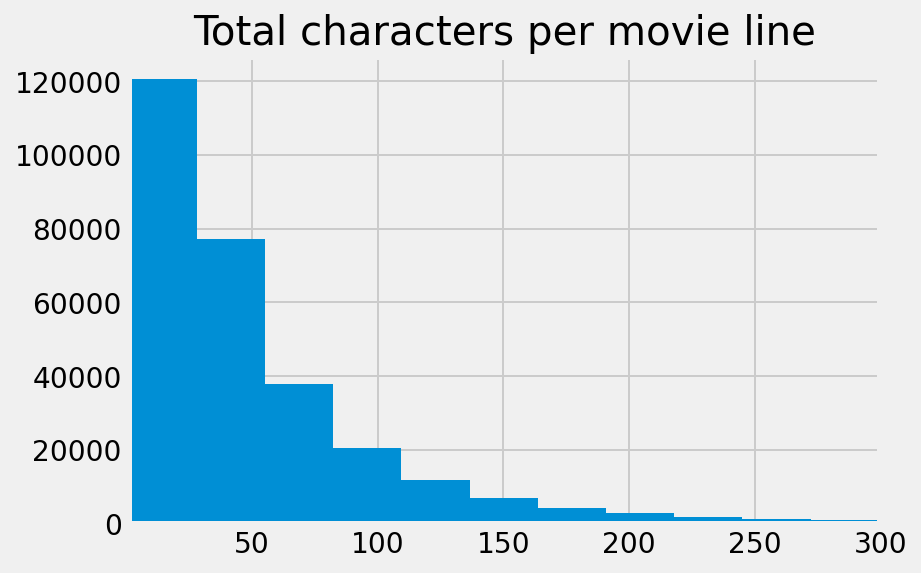

In [18]:
#total characters per movie line
text.str.len().hist(bins=100)
plt.xlim(1, 300)
plt.title("Total characters per movie line");

The majority of movie lines seem to be 50 characters or less.

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


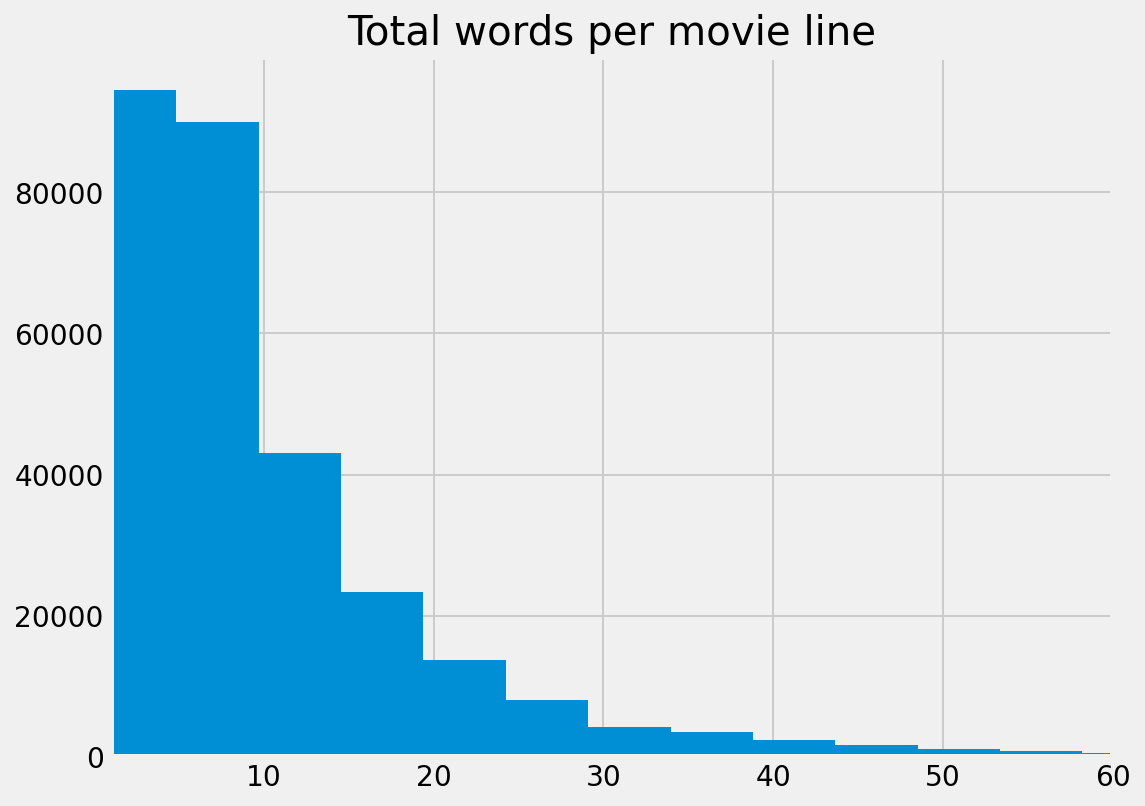

In [19]:
#total words per movie line
plt.figure(figsize=(8, 6))
text.str.split().map(lambda x: len(x)).hist(bins=100)
plt.xlim(1, 60)
plt.title("Total words per movie line");

The majority of movie lines are 10 words or less while the supermajority of movie lines are 20 words or less.

In [20]:
from matplotlib.pyplot import figure


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


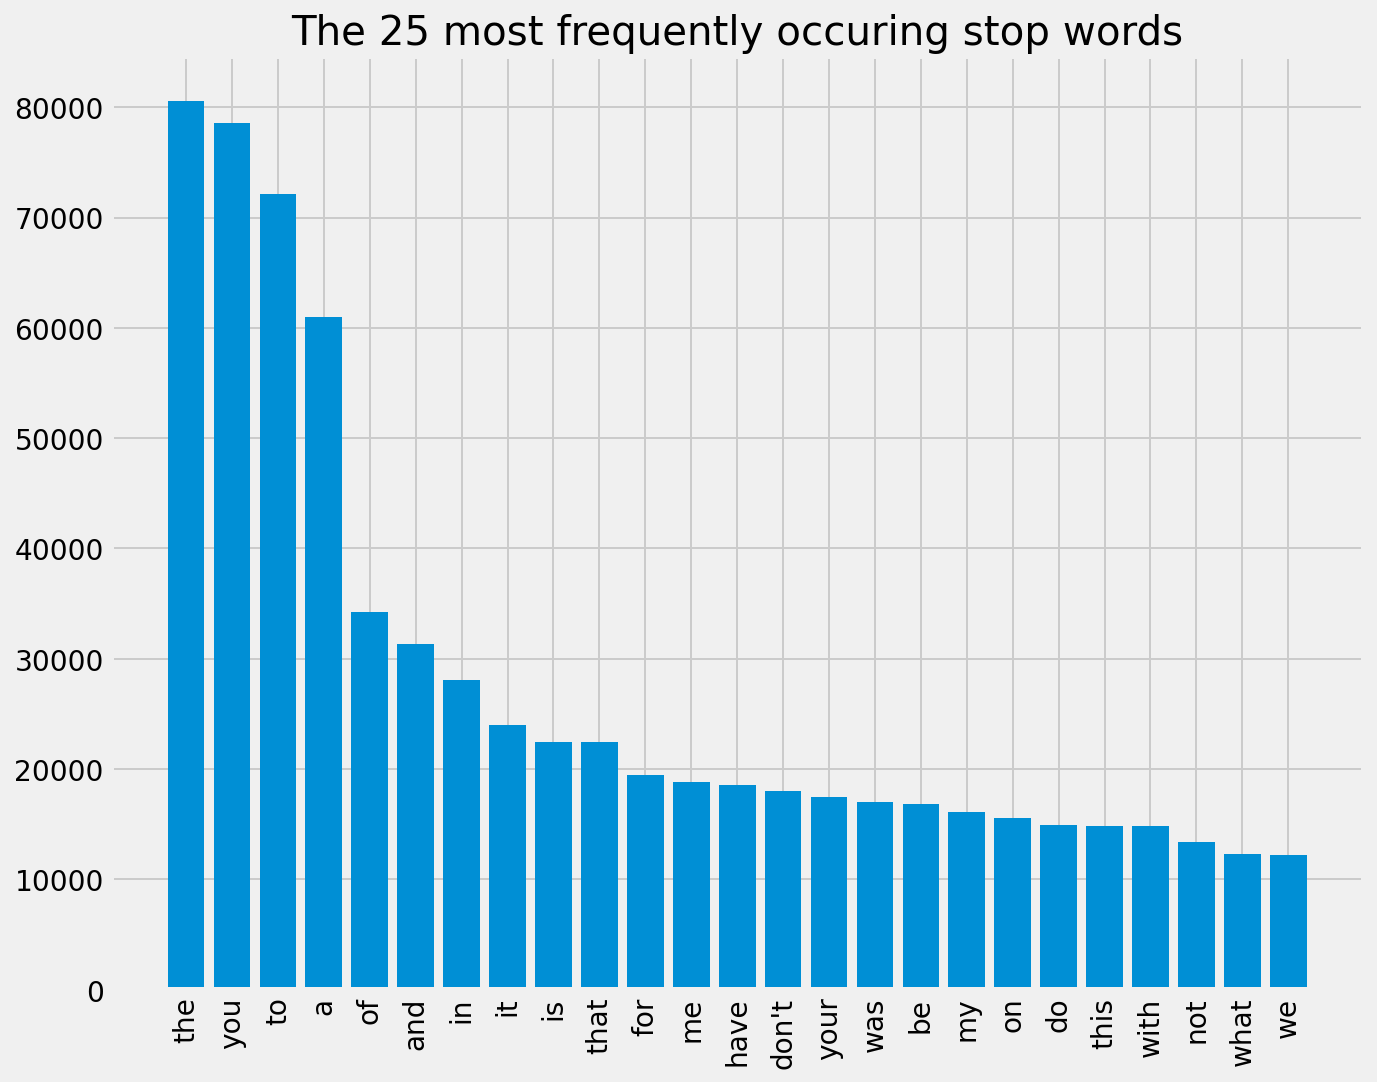

In [21]:
#stopword distribution
stop=set(stopwords.words('english'))
corpus=[]
new_text= text.str.split()
new_text=new_text.values.tolist()
corpus=[word for i in new_text for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
            
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:25] 
x,y=zip(*top)
plt.figure(figsize=(10, 8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title("The 25 most frequently occuring stop words");
# plt.figure(figsize=(18, 6));

"The", "you", "to", and "a" are the most frequently occuring stopwords.  

In [22]:
from collections import Counter

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


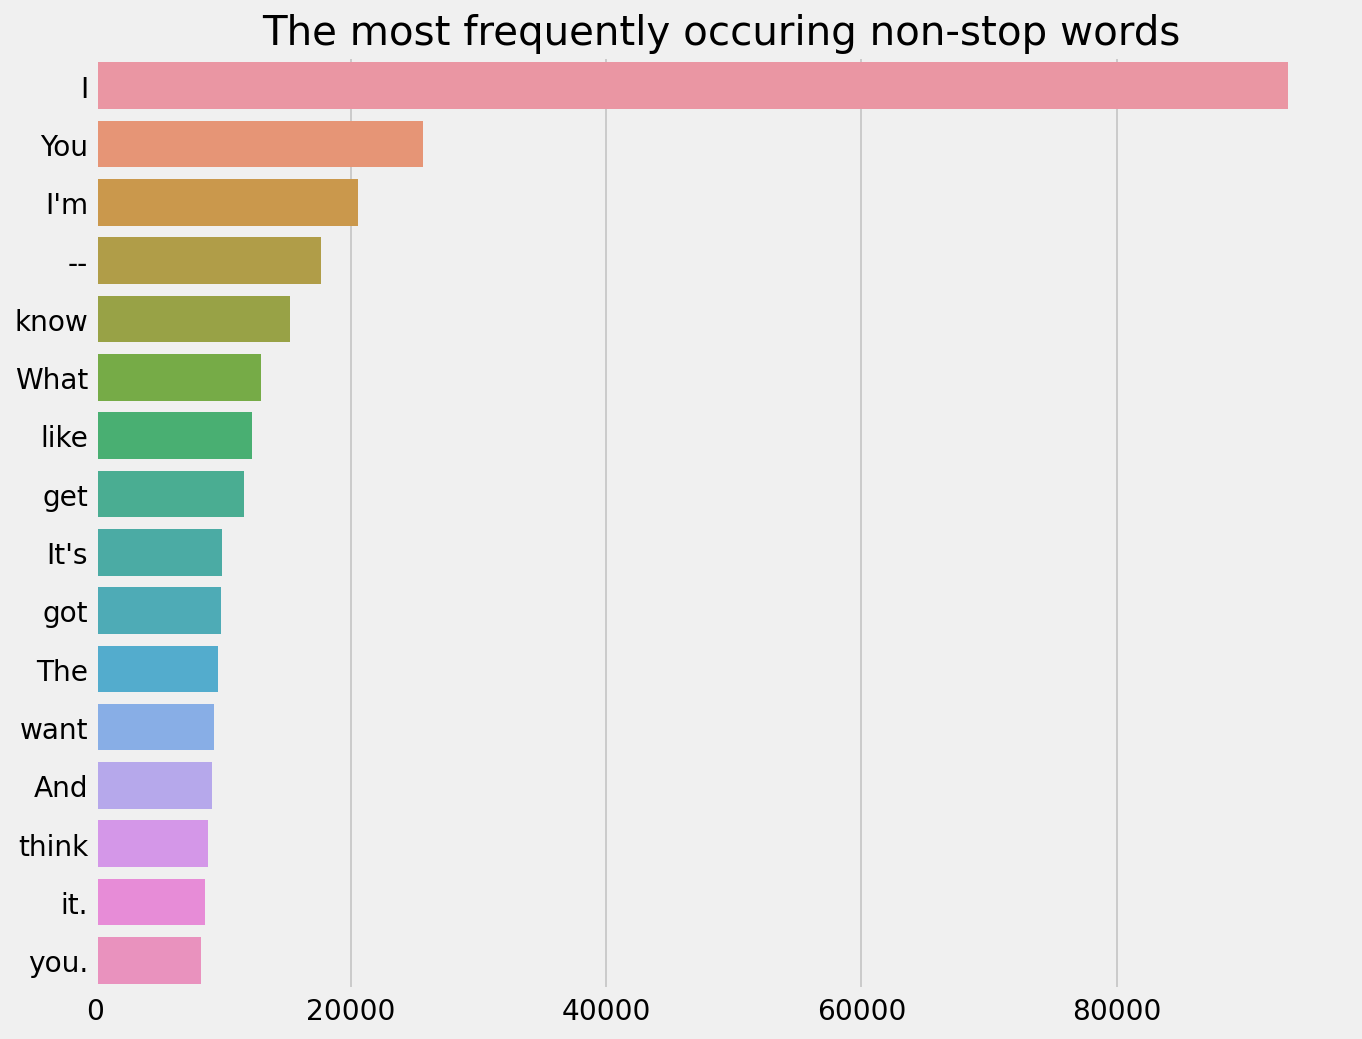

In [23]:
#non-stopword distribution
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)
plt.figure(figsize=(10, 8))        
sns.barplot(x=y,y=x)
plt.title("The most frequently occuring non-stop words");

"I", "You", "I'm", "know" are the most common for nonstop words. 

The appearance of "--" and periods after it and you at the bottom of the list leave me tempted to remove special characters, but since i'm not entirely sure how that'll affect a chatbot as of yet, I'm leaving them for now.

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


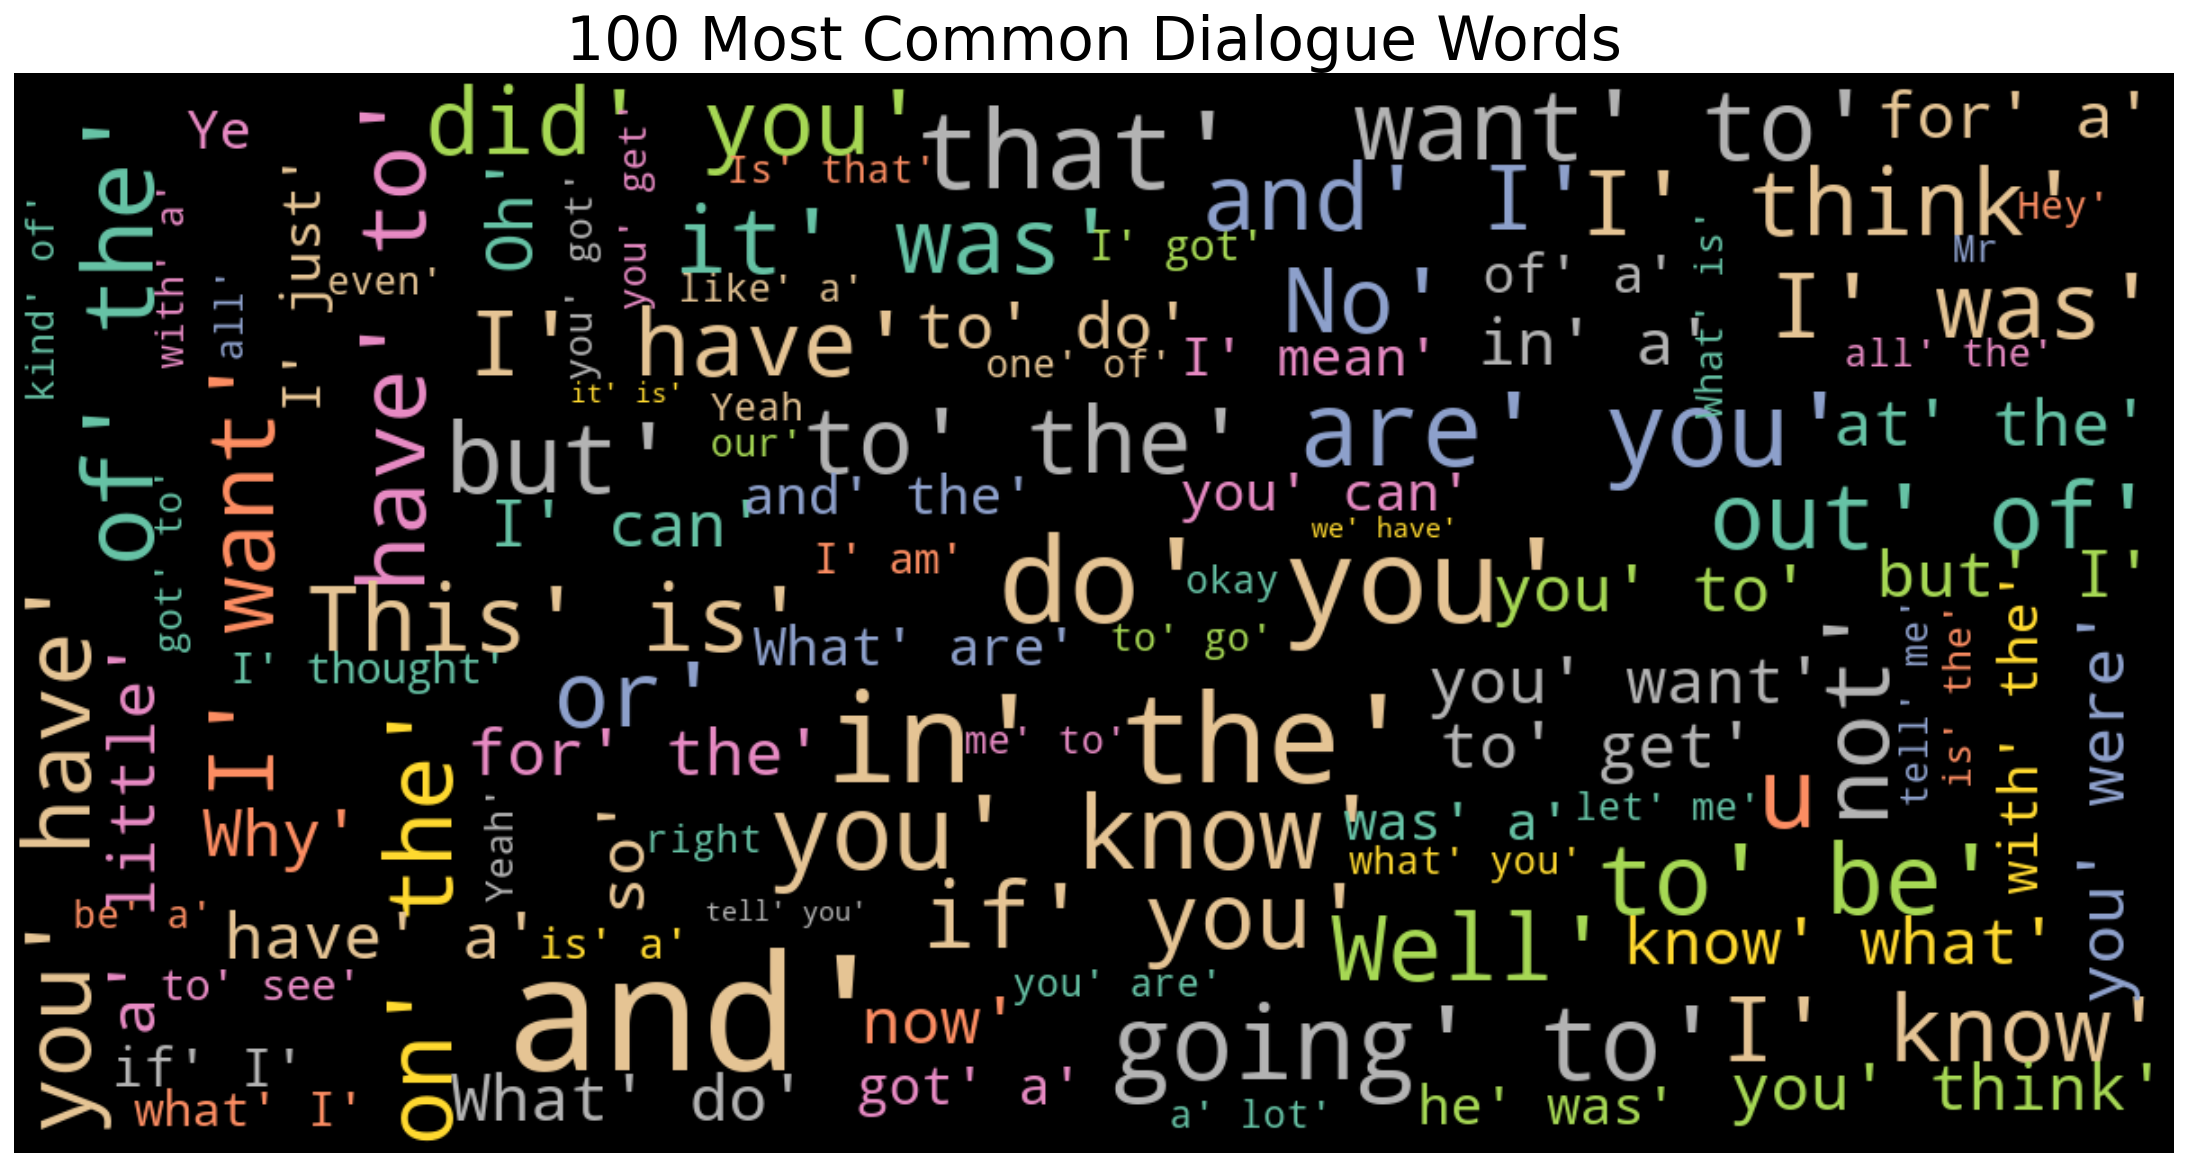

In [24]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        colormap='Set2',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(figsize=(15,10), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('100 Most Common Dialogue Words', fontsize=30)
    plt.tight_layout(pad=0)
    plt.show()

show_wordcloud(corpus);

<br>

## 2.1 N-GRAM EXPLORATION

In [25]:
#function to get the most frequent n-grams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
def plot_n_gram(corpus, n):
    top_n_grams=get_top_ngram(corpus,n)[:20]
    x,y=map(list,zip(*top_n_grams))
    plt.figure(figsize=(10, 8))
    sns.barplot(x=y,y=x)
    plt.xlabel("Count")
    plt.ylabel("N-gram")
    plt.title("Top Combinations")


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2.1.1 N = 2

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


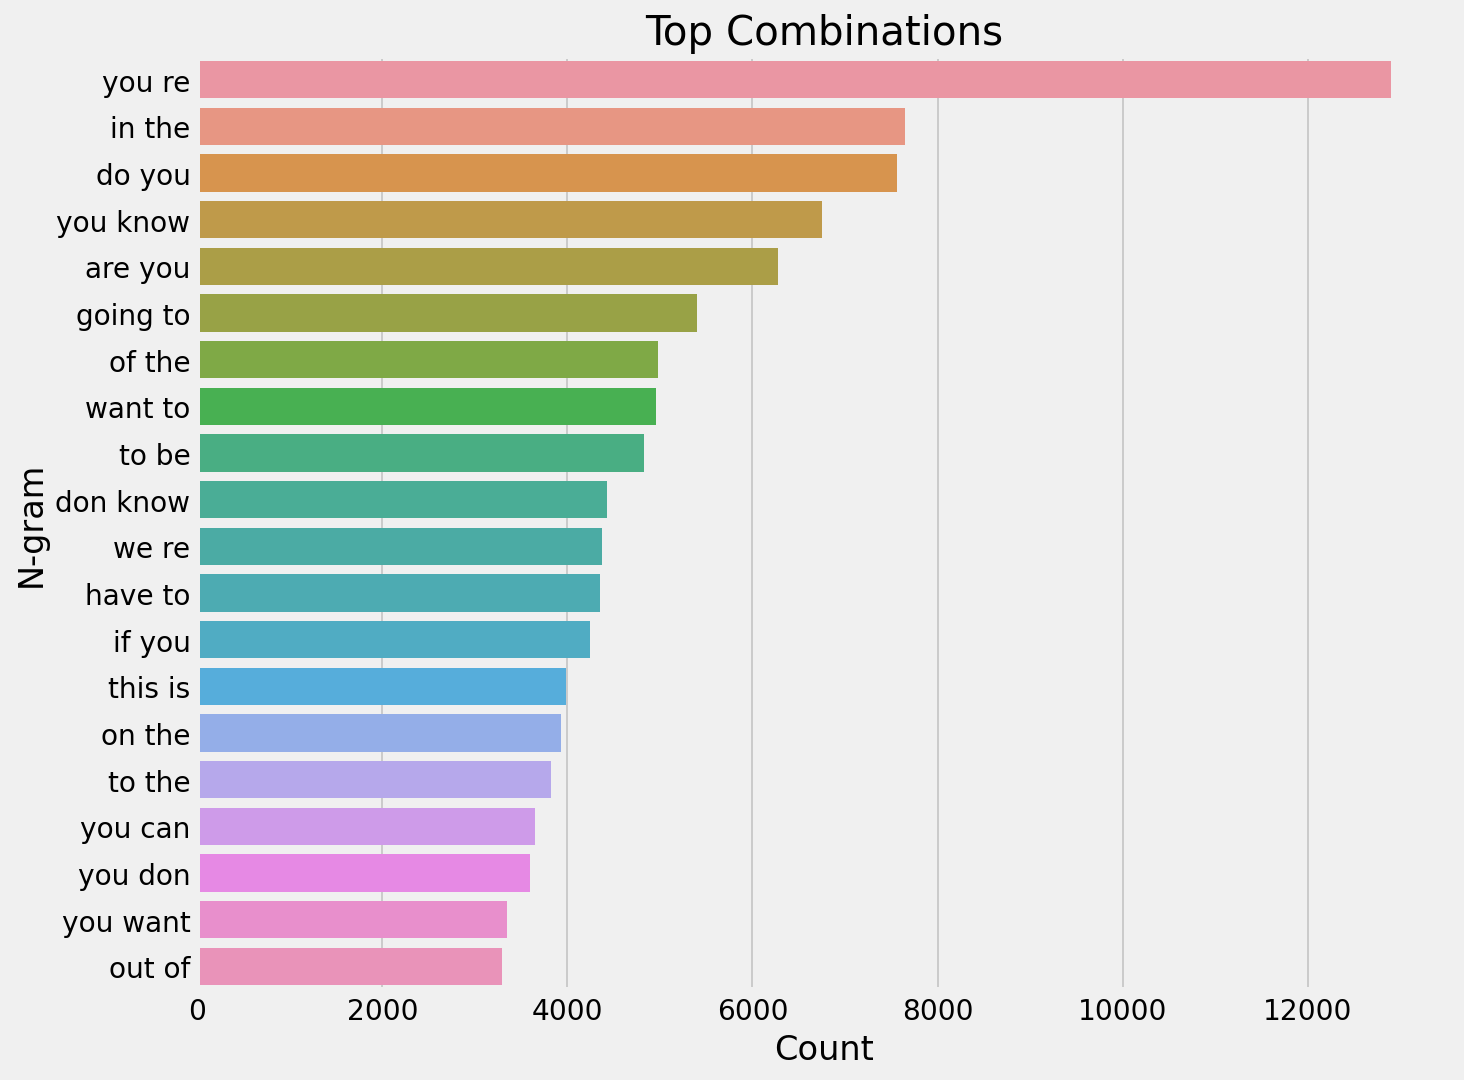

In [27]:
plot_n_gram(text, 2);

In terms of bigrams there's nothing unexpected. They make sense for what they're supposed to be doing (mimicking natural language).

<br>

## 2.1.2 N = 3

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


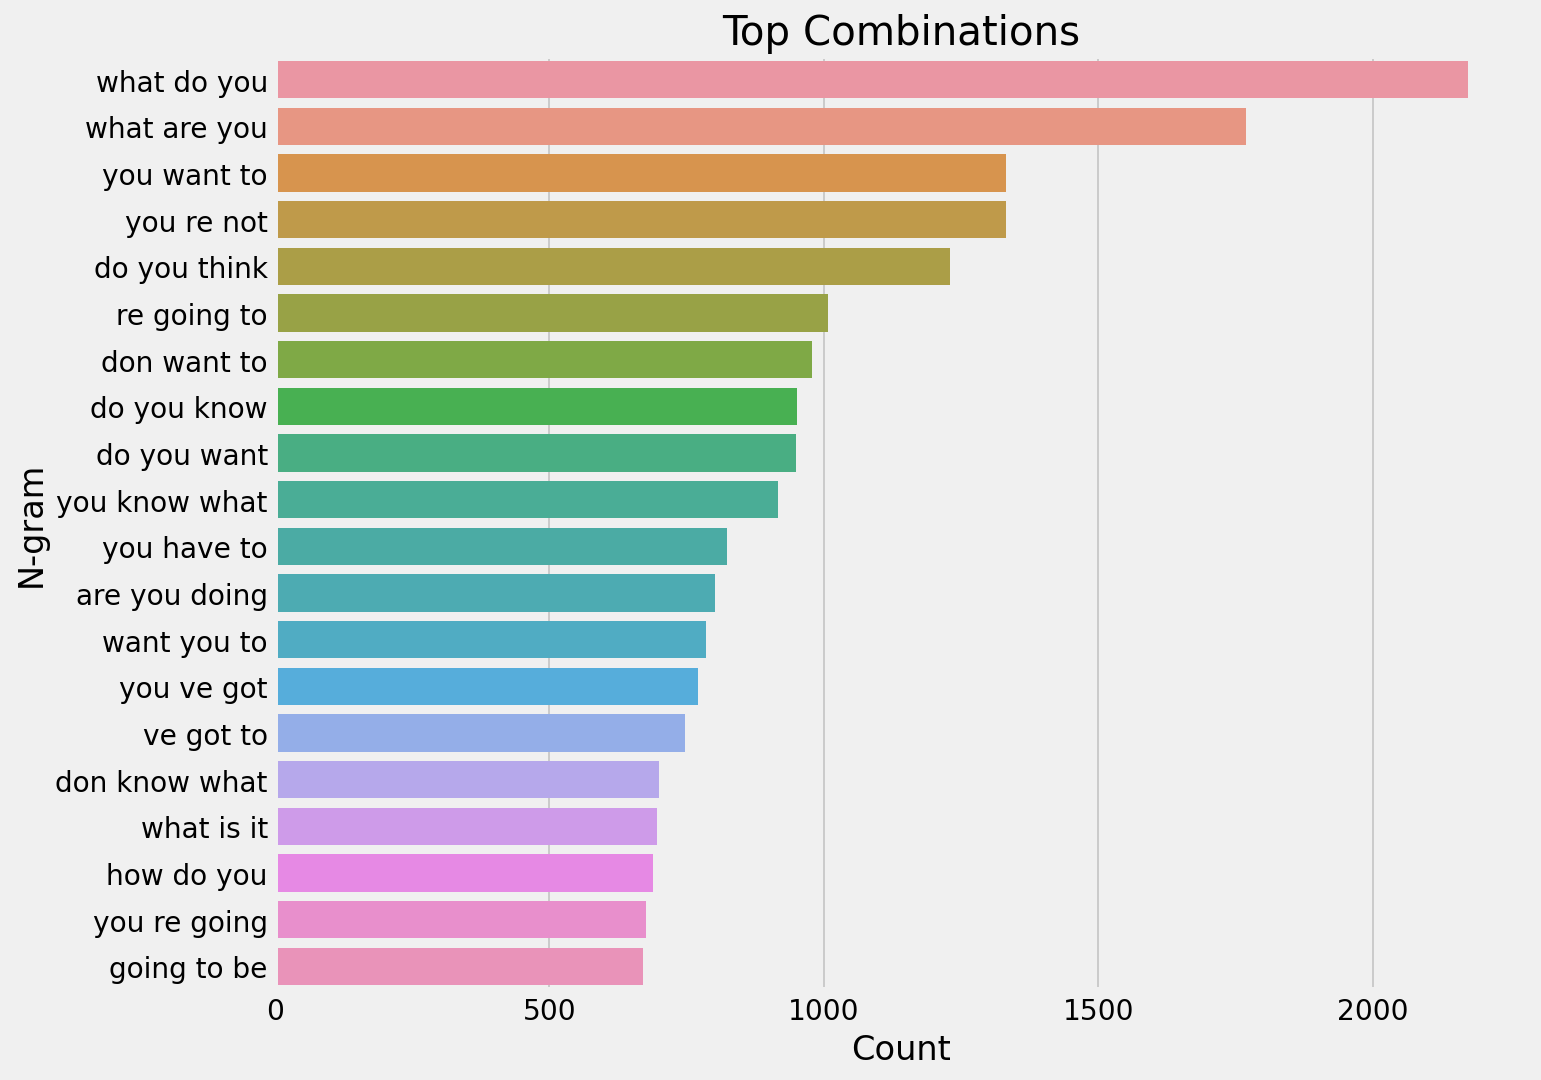

In [28]:
plot_n_gram(text, 3);

In terms of trigrams, it's clear that three word combinations lean heavily towards questions (ex. "what do you", "what are you", "do you think", "do you know", etc.).

While this chatbot will be based on movie dialogue, this feature of the dataset is analogous to the dialogue pattern a person has when considering whether they shoould purchase a product and/or service. 

<br>

## 2.1.3 N = 4

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


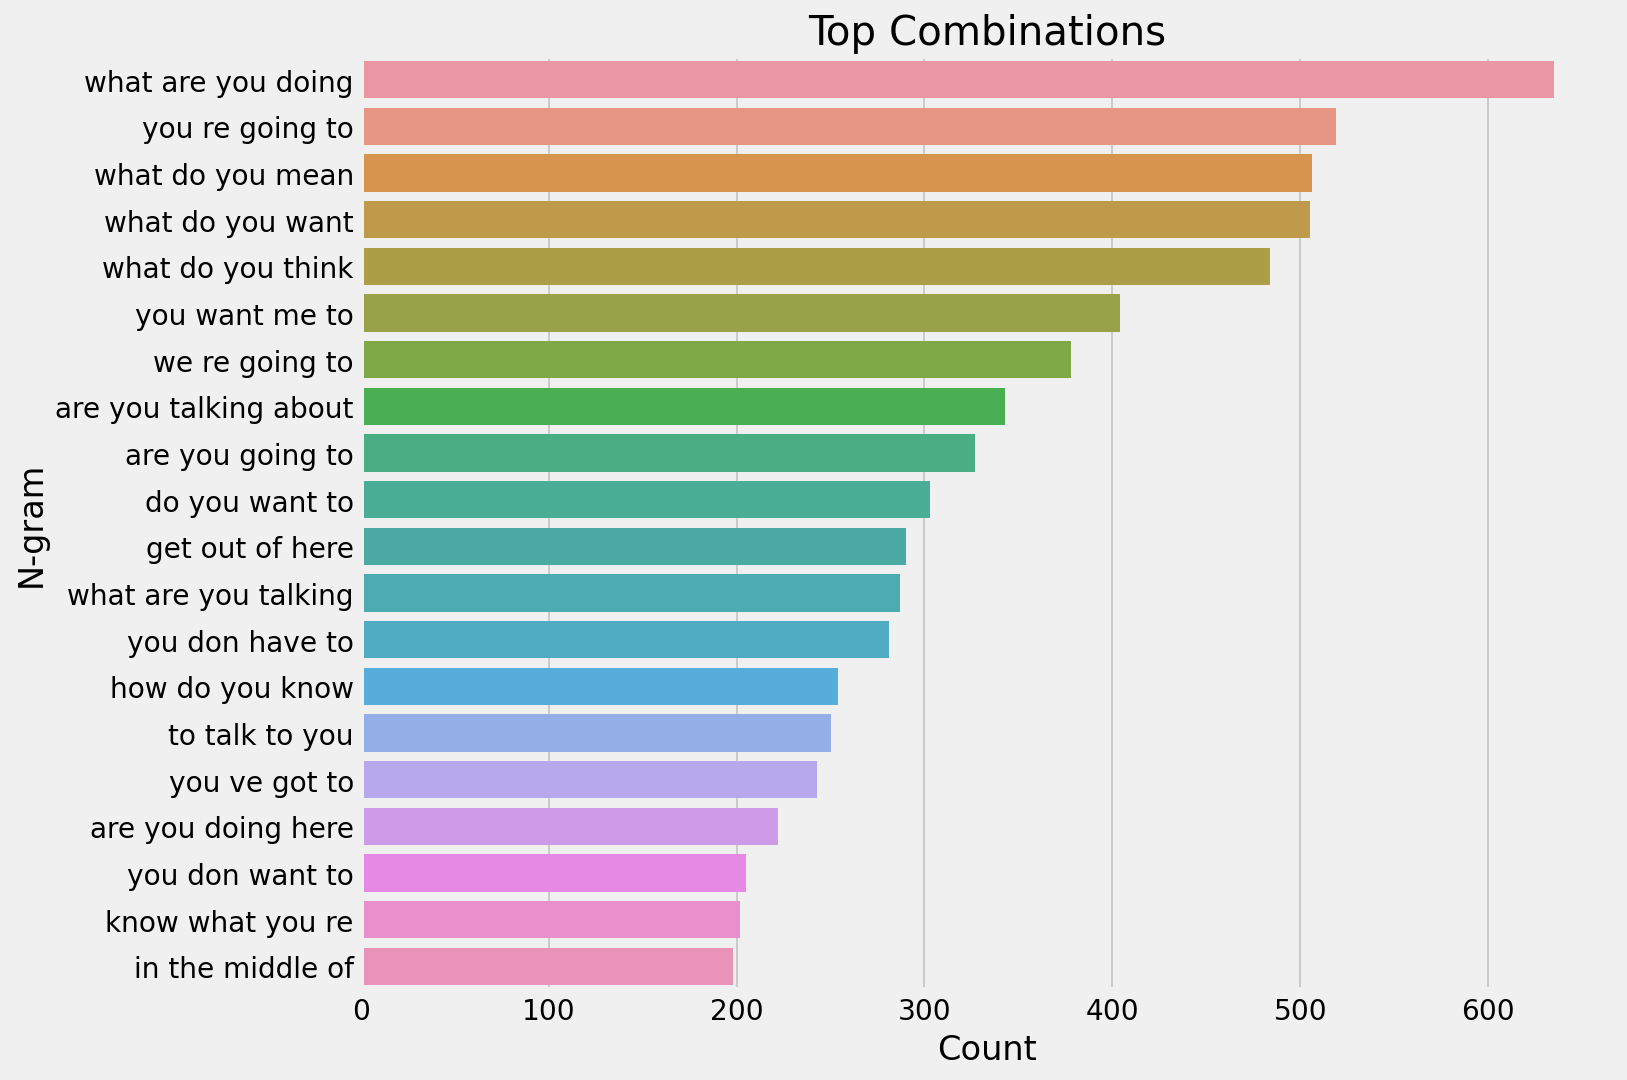

In [29]:
plot_n_gram(text, 4);

N-grams have 4 words in length seem to solidify some of the patterns seen above with trigrams. 

Additionally, the preposition "to" features heavily here.

<br>

## 2.1.3 N = 5

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


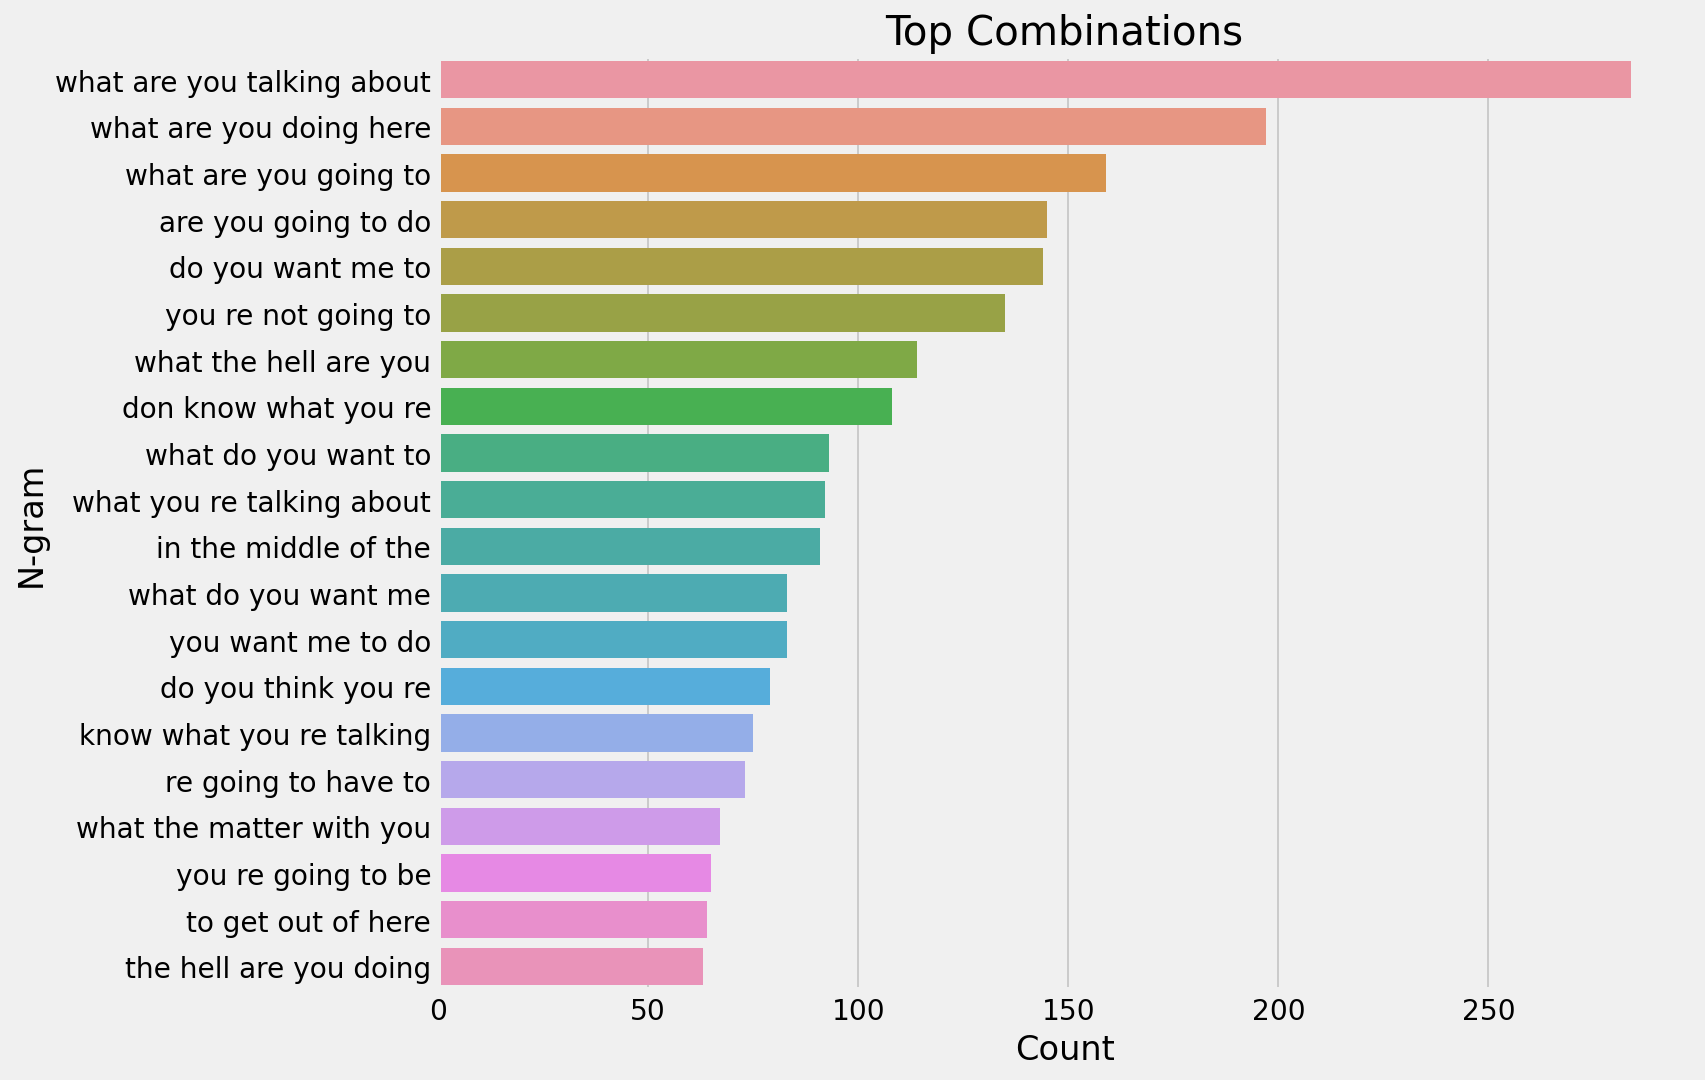

In [30]:
plot_n_gram(text, 5);

While we see many of the same patterns as before, one can't help but notice the frequency of the word "you" in n-grams of 5 words in length (and, in hindsight, the earlier ones too).

<br>

## 2.1.3 N = 6

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


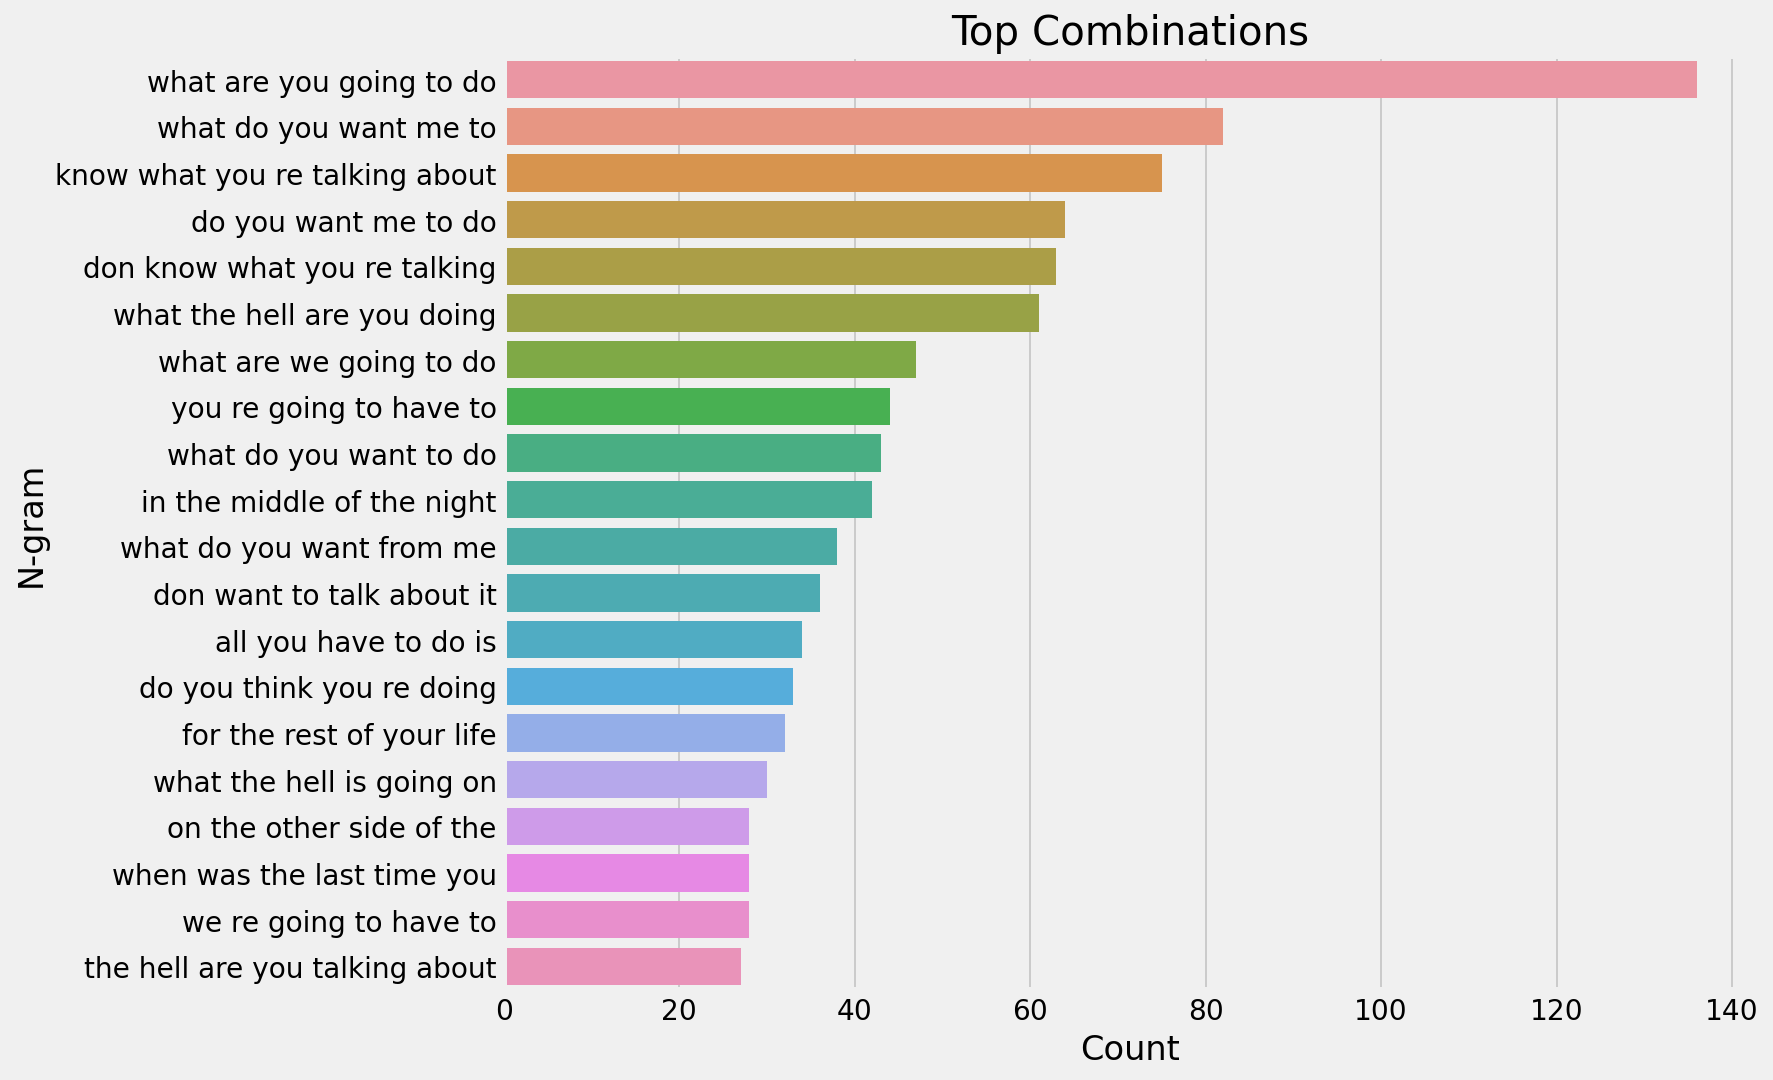

In [31]:
plot_n_gram(text, 6);

As should be expected, these n-grams closely resemble the ones before and seem to be mirrors of each other (ex. "what are you going to do" and "what do you want me to do").

They also lean heavily on the word do and its variations (ex. doing).

<br>

## 2.2 TOPIC MODELING

The aim here is to use unsupervised learning to extract the main topics within this movie dialogue dataset.

In [32]:
#pre-processing the data so it can be modeled 
def preprocess_lines(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for lines in df['text']:
        words=[w for w in word_tokenize(lines) if (w not in stop)] #tokenizing and removing stopwords
        
        words=[lem.lemmatize(w) for w in words if len(w)>2] #lemmatizing to common bases/roots
        
        corpus.append(words)
    return corpus

corpus=preprocess_lines(lines)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
#creating a bag of words model using gensim
dic=gensim.corpora.Dictionary(corpus)
bag_of_words_corpus = [dic.doc2bow(doc) for doc in corpus]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
#using LDA (Latent Dirichlet Allocation) to create a topic model
lda_model = gensim.models.LdaMulticore(bag_of_words_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
vis = gensimvis.prepare(lda_model, bag_of_words_corpus, dic)
vis

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.128759  0.076296       1        1  41.341861
3     -0.132302  0.211464       2        1  21.993975
1     -0.098653 -0.308294       3        1  19.005629
2      0.359715  0.020535       4        1  17.658535, topic_info=       Term          Freq         Total Category  logprob  loglift
22      ...  50737.000000  50737.000000  Default  30.0000  30.0000
37      You  34515.000000  34515.000000  Default  29.0000  29.0000
84      n't  49329.000000  49329.000000  Default  28.0000  28.0000
16     What  19836.000000  19836.000000  Default  27.0000  27.0000
6       're  20332.000000  20332.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
40      But   1199.115002   7402.352920   Topic4  -5.4865  -0.0863
29     This    881.685188   4335.096791   Topic4  -5.7940   0.1413
664    Your    758.053599   1852.219939   Topic4  -5.9451   0.8406
452    come    809.663405   5103.879878   Topic4  -5.8792  -0.1072
132  little    757.650961   3877.602749   Topic4  -5.9456   0.1012

[223 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
274       1  0.999909    'll
6         2  0.999978    're
61        1  0.000203    've
61        2  0.999694    've
61        3  0.000101    've
...     ...       ...    ...
322       1  0.999915  would
755       3  0.999819  wrong
730       3  0.998837   yeah
272       3  0.999750   year
1094      4  0.999468    yes

[289 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

If the dataset was skewed to a particular topic you'd expect to see topical words like war, sports, film, etc. to be amongst the most relevant terms. 

In this instance though we see more every day words that lean more towards the fundamental building blocks of language and speech as opposed to a strong leaning towards a particular topic or theme. 

They're also words that are more conversational in nature, which is to be expected since this is movie dialogue.

<b>Note:</b> there is supposed to be a graph above this cell. In some instances after the cell is run and the notebook is closed however, it does not subsequently appear. To see what the chart looks like, you can rerun the above code.

<br>

## 2.3 SENTIMENT ANALYSIS

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


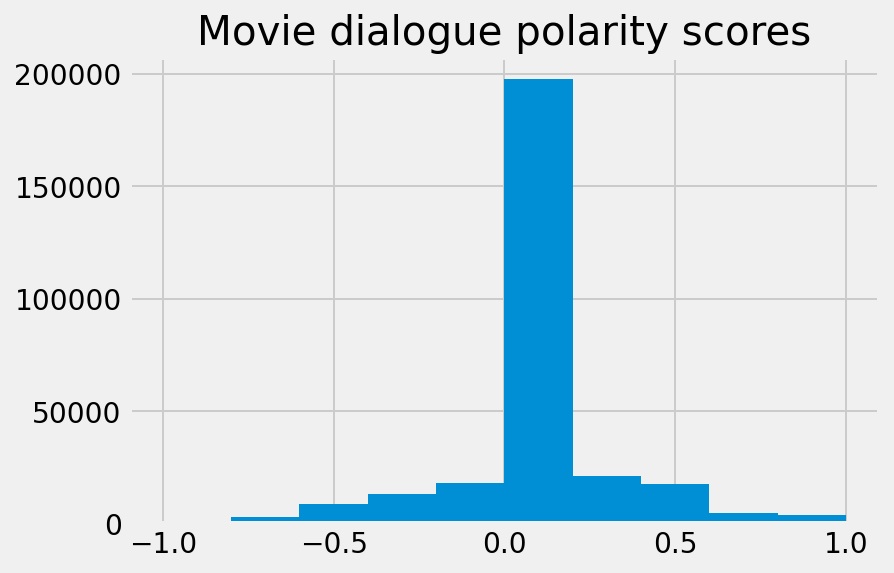

In [36]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

lines['polarity_score']=lines['text'].apply(lambda x : polarity(x))
lines['polarity_score'].hist()
plt.title("Movie dialogue polarity scores");

With the majority of the lines hovering around 0, it can be said the movie dialogue is primarily neutral/slightly positive in sentiment.

<br>

## 2.4 NAMED ENTITY RECOGNITION

Named Entity Recognition is the process of detecting the named entities such as person names, location names, company names, etc. from the text.

|Type|Description|
|:---|:---|
|**PERSON**|People, including fictional.|
|**NORP**|Nationalities or religious or political groups.|
|**FAC**|Buildings, airports, highways, bridges, etc.|
|**ORG**|Companies, agencies, institutions, etc.|
|**GPE**|Countries, cities, states.|
|**LOC**|Non-GPE locations, mountain ranges, bodies of water.|
|**PRODUCT**|Objects, vehicles, foods, etc. (Not services.)|
|**EVENT**| Named hurricanes, battles, wars, sports events, etc.|
|**WORK_OF_ART**|Titles of books, songs, etc.|
|**LAW**|Named documents made into laws.|
|**LANGUAGE**|Any named language.|
|**DATE**|Absolute or relative dates or periods.|
|**TIME**|Times smaller than a day.|
|**PERCENT**|Percentage, including ”%“.|
|**MONEY**|Monetary values, including unit.|
|**QUANTITY**|Measurements, as of weight or distance.|
|**ORDINAL**|“first”, “second”, etc|
|**CARDINAL**| Numerals that do not fall under another type.|

In [37]:
nlp = spacy.load("en_core_web_sm") #loading a pre-trained name entity recognition model

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


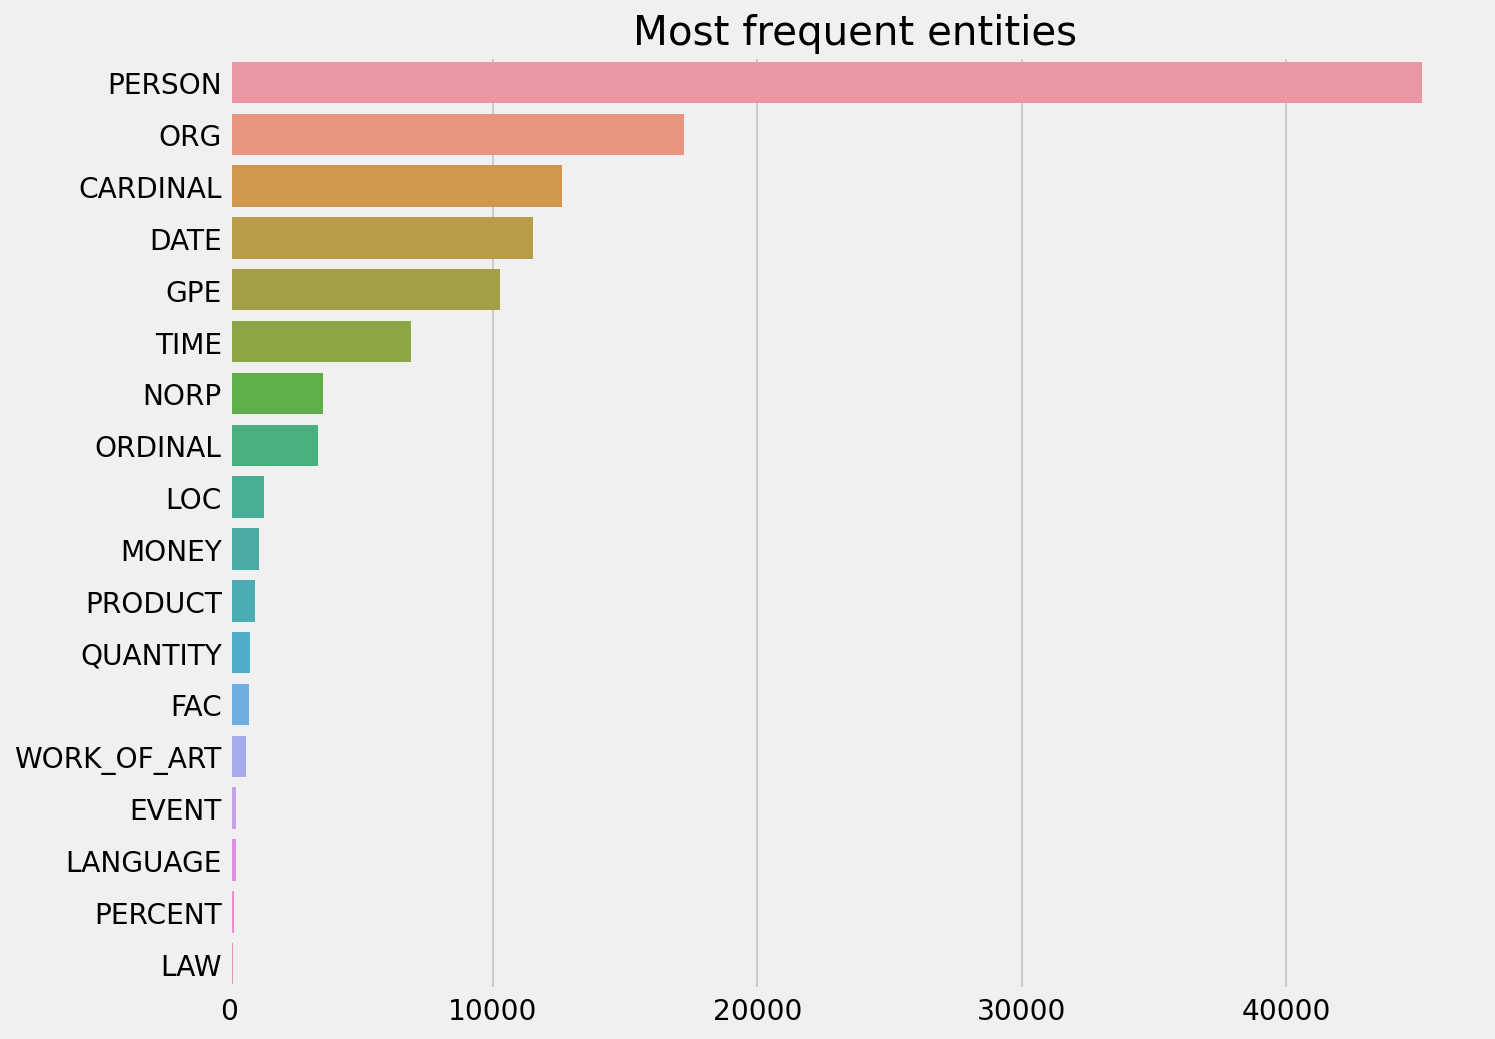

In [38]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=lines['text'].apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

x,y=map(list,zip(*count))
plt.figure(figsize=(10, 8))
sns.barplot(x=y,y=x)
plt.title("Most frequent entities");

Person is by far the dominant entity type.

In [ ]:
#run above again tonight to make the graph bigger
#don't run during the day b/c it takes forever to run

In [ ]:
# should I show most common for each category?
# feels likes overkill to me

In [ ]:
#remember to save all images 

#plt.savefig('../images/top_10_words_subs_everton_bar.png');

<br>

## 2.4 PARTS OF SPEECH TAGGING

Parts of speech tagging assigns parts of speech labels to words in a sentence.

|Part of Speech|Definition|
|:---|:---|
|**CC**|coordinating conjunction|
|**CD**|cardinal digit|
|**DT**|determiner|
|**EX**|existential there|
|**FW**|foreign word|
|**IN**|preposition/subordinating conjunction|
|**JJ**|This NLTK POS Tag is an adjective (large)|
|**JJR**|adjective, comparative (larger)|
|**JJS**|adjective, superlative (largest)|
|**LS**|list market|
|**MD**|modal (could, will)|
|**NN**|noun, singular (cat, tree)|
|**NNS**|noun plural (desks)|
|**NNP**|proper noun, singular (sarah)|
|**NNPS**|proper noun, plural (indians or americans)|
|**PDT**|predeterminer (all, both, half)|
|**POS**|possessive ending (parent\ ‘s)|
|**PRP**|personal pronoun (hers, herself, him, himself)|
|**PRP(dollar sign)**|possessive pronoun (her, his, mine, my, our )|
|**RB**|adverb (occasionally, swiftly)|
|**RBR**|adverb, comparative (greater)|
|**RBS**|adverb, superlative (biggest)|
|**RP**|particle (about)|
|**TO**|infinite marker (to)|
|**UH**|interjection (goodbye)|
|**VB**|verb (ask)|
|**VBG**|verb gerund (judging)|
|**VBD**|verb past tense (pleaded)|
|**VBN**|verb past participle (reunified)|
|**VBP**|verb, present tense not 3rd person singular(wrap)|
|**VBZ**|verb, present tense with 3rd person singular (bases)|
|**WDT**|wh-determiner (that, what)|
|**WP**|wh- pronoun (who)|
|**WRB**|wh- adverb (how)|

In [207]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

In [211]:
def text_sanitizer(text):
    
    remove_special_characters = re.sub("[^a-zA-Z0-9]", " ", text)

    return remove_special_characters

In [212]:
lines['clean_text'] = lines['text'].apply(text_sanitizer)

In [213]:
tags=lines['clean_text'][:10_000].apply(lambda x : pos(x))#kept getting an error, so I had to restrict this to the first 10k observationsx
tags=[x for l in tags for x in l]
counter=Counter(tags)

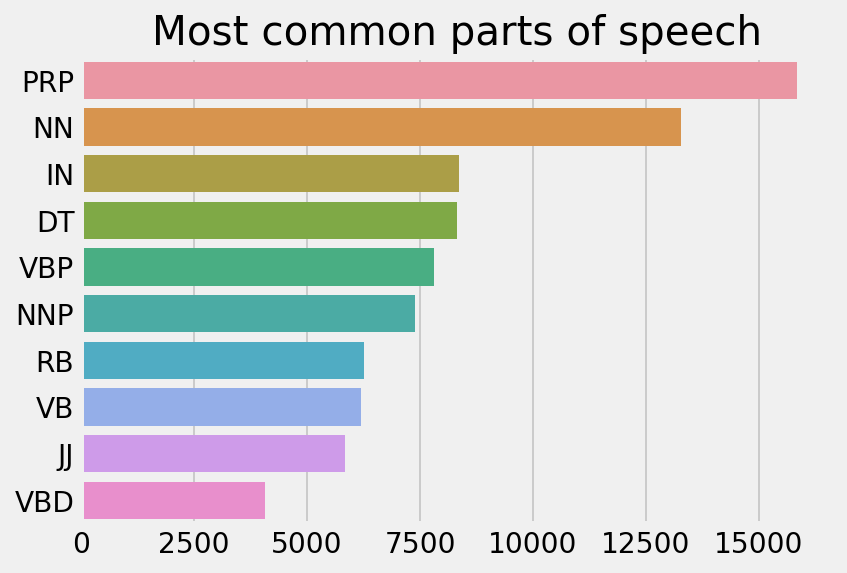

In [214]:
x,y=list(map(list,zip(*counter.most_common(10))))
sns.barplot(x=y,y=x)
plt.title("Most common parts of speech");

After seeing how heavily words like "you" featured in the n-grams and how dominant "you" "I" and "I'm" were in the non-stopword frequency list, it's not surprising that personal pronouns are the most common part of speech in this small sample.

Additionally, since every sentence requires a subject, if a pronoun isn't used, there's a good chance it'll be a noun. Hence is being second in the list.

<br>

## 2.5 TEXT COMPLEXITY

The following values are based on the Flesh Reading Ease scale:

|Score|Interpretation|
|:---|:---|
|**0-30**|College|
|**50-60**|High School|
|**60+**|Fourth grade|

Essentially, the lower the course, the more difficult a text is to understand.

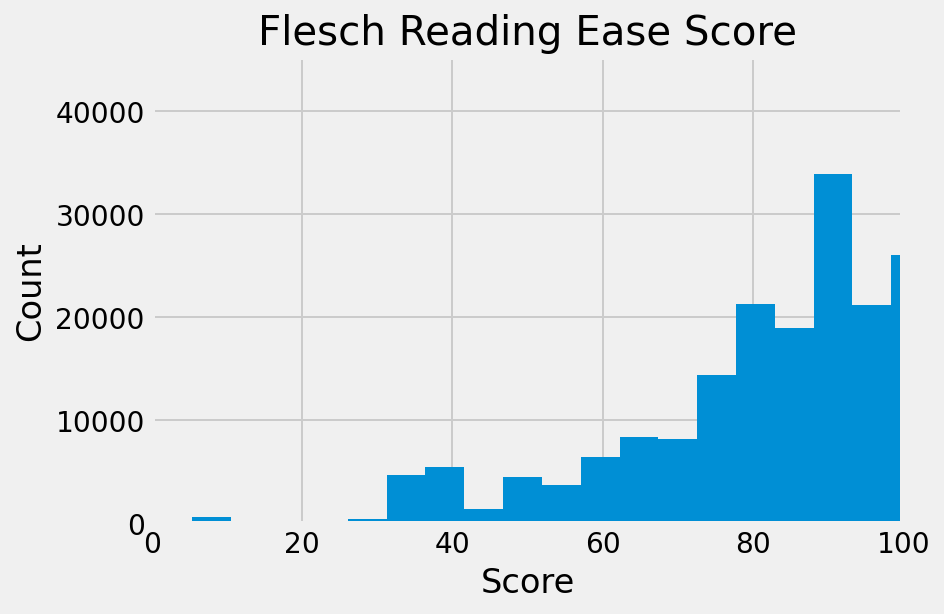

In [220]:
from textstat import flesch_reading_ease

lines['text'].apply(lambda x : flesch_reading_ease(x)).hist(bins=500)
plt.xlim(0, 100)
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Flesch Reading Ease Score");

While I was initially worried about using movie dialogue for a model that I hoped would eventually be the impetus for a chatbot that can be used in a retail setting, I am *very* happy with Flesch Reading Ease score distribution this dataset has.

The simplcity of its language mimics the simplcitiy of the language used in high quality copywriting. 

What's more, in a B2B settings simplicity of language is often valued over more complex concepts because the person typically making a purchase is less technical than the products end-user. 